# Atividade: Neurônio Artificial

**INSTITUTO FEDERAL DE MINAS GERAIS**

*Departamento de Engenharia e Computação*   

*Professor: Ciniro Nametala Leite*

*Aluno: Luan Carlos dos Santos*

---

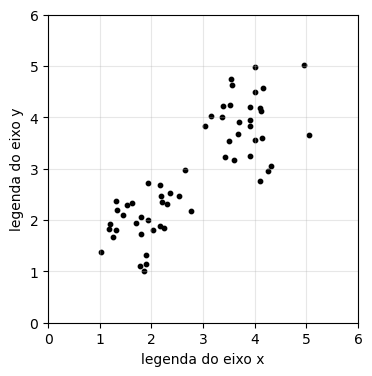

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# somatorio do produto de x pelo seu erro 
def neuronio(x1, x2, bias, w0, w1, w2):
   u = (x1 * w1) + (x2 * w2) + (bias * w0)
   return 1 if u > 0 else 0  

# leitura dos dados
dataset = pd.read_csv('data-sets/amostravariada.csv', sep=';', decimal=',')

# convertendo os dados
dataset['x'] = pd.to_numeric(dataset['x'], errors='coerce')
dataset['y'] = pd.to_numeric(dataset['y'], errors='coerce')

plt.figure(figsize=(4, 4))# definindo o tamanho do grafico
plt.scatter(dataset['x'], dataset['y'], c='black', s=10)# configurações do gráfico de dispersão, com um par ordenado(vetor(x), vetor(y)), uma cor e o size do ponto, passados no parâmetro
plt.xlim(0,6)# tamanho do eixo x
plt.ylim(0,6)# tamanho do eixo y
plt.xlabel("legenda do eixo x")
plt.ylabel("legenda do eixo y")
plt.grid(True, alpha=0.3) # opacidade das linhas do grid
plt.show()# plotando o gráfico

## Classificação

In [46]:
# Erros 
w0 = 6 # termo do viés
w1 = 1 # erro 1
w2 = 1 # erro 2
bias = -1 # viés

# ----------------
classificacoes = []

for i, linha in dataset.iterrows():
   classe = neuronio(linha['x'], linha['y'], bias, w0, w1, w2)
   classificacoes.append(classe)

dataset['classe'] = classificacoes
dataset.head()
# dataset.tail()

,x,y,classe
0,1.183988,1.832880,0
1,1.523565,2.293337,0
2,2.199241,2.342880,0
3,2.768052,2.179136,0
4,2.165374,1.888445,0


## Gráfico

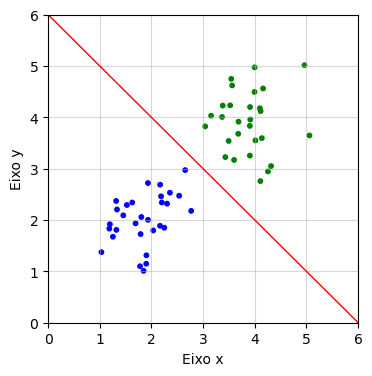

In [47]:
plt.figure(figsize=(4,4))
cores = ['blue' if c == 0 else 'green' for c in dataset['classe']]

# gerando a  reta de separação
eixox = np.linspace(0, 6, 100)
eixoy = w0 - eixox

plt.scatter(dataset['x'], dataset['y'], c = cores, s=10)
plt.plot(eixox, eixoy, 'r-', linewidth=1)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")
plt.grid(True, alpha=0.5)
plt.show()

# dataset.tail()

## Funções de Ativação

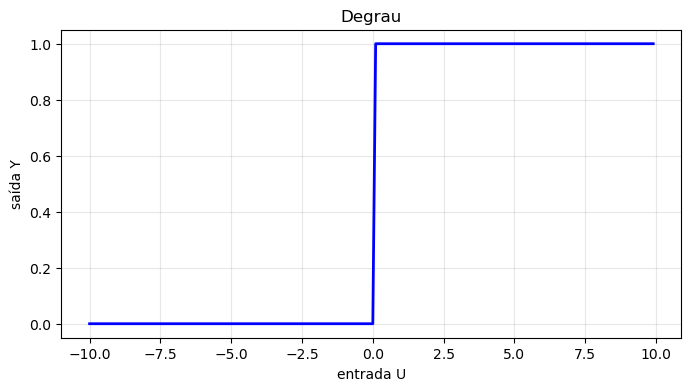

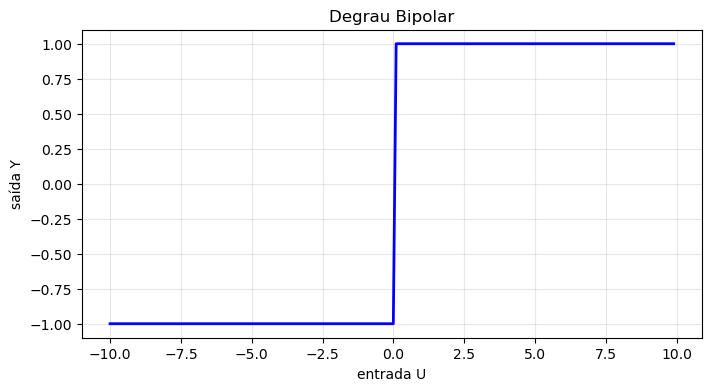

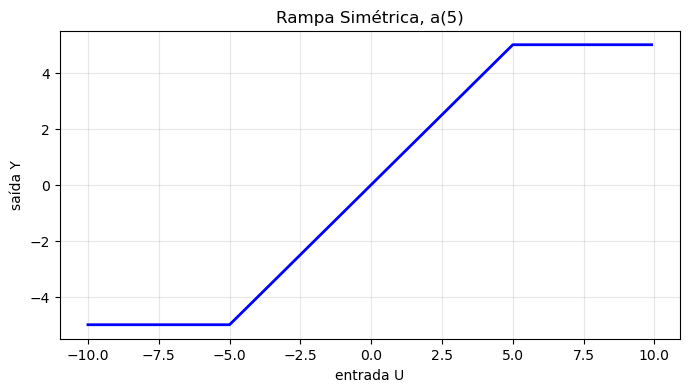

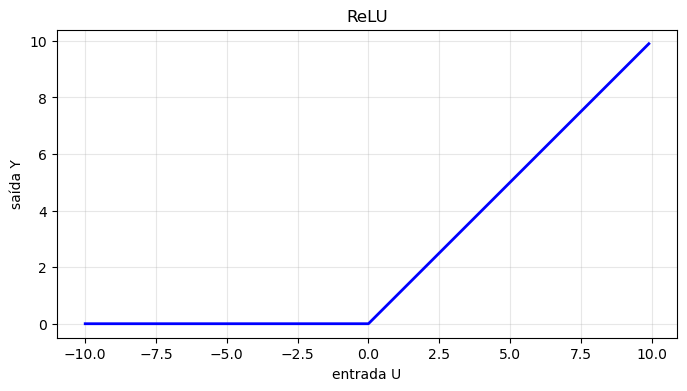

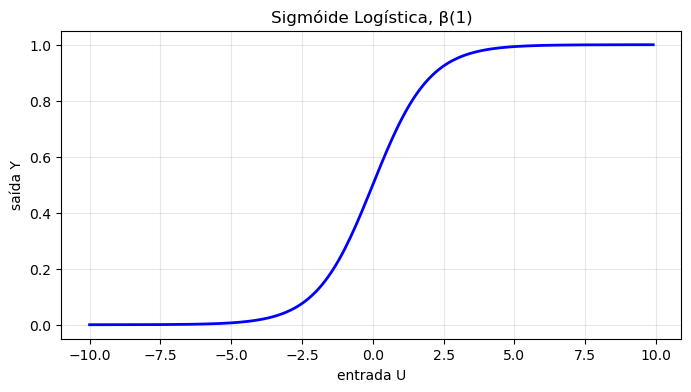

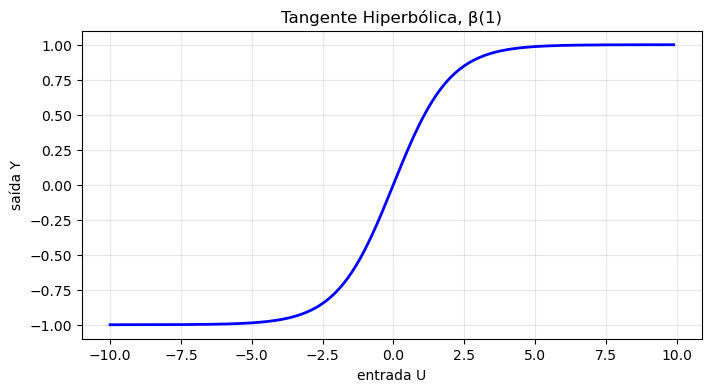

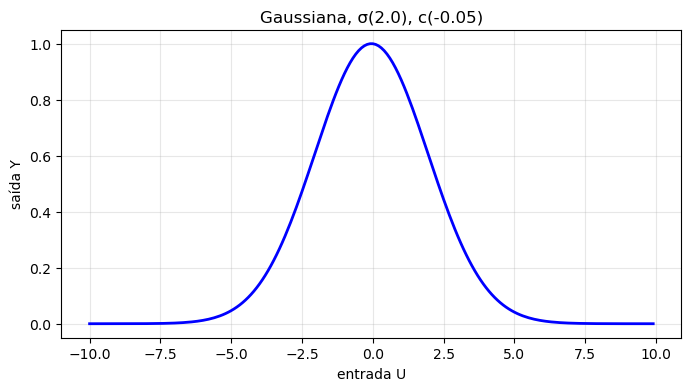

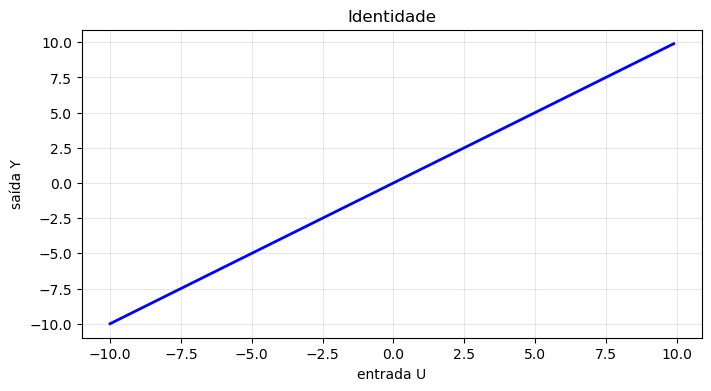

In [ ]:
def degrau(x):
   return np.where(x > 0, 1, 0)

def degrau_bipolar(u):
   return np.where(u > 0, 1, np.where(u == 0, 0, -1))
   
def rampa_simetrica(u, a):
   return np.where(u < -a, -a, np.where(u > a, a, u))
   
def relu(u):
   return np.maximum(0,u)
   
def sigmoide_logistica(x, beta):# 0 < y < 1
   return 1 / (1 + np.exp(-beta * x))
   
def tangente_hiperbolica(u, b):# -1 < y < 1
   return (1 - np.exp(-b * u))/(1 + np.exp(-b * u))
   
def gaussiana(u, sig, c):
   return np.exp(-(((u-c)**2)/(2*sig**2)))

def identidade(u):
   return u
   
x_val = np.arange(-10, 10, 0.1)
beta = 1
a = 5
sigma = 2.0
c = round(np.mean(x_val), 2)

ydegrau_val = degrau(x_val)
ydegralBipolar = degrau_bipolar(x_val)
yrampa_simetrica = rampa_simetrica(x_val, a)
yreLU = relu(x_val)
ysigmoide_logistica = sigmoide_logistica(x_val, beta)
ytg_hiperbolica = tangente_hiperbolica(x_val, beta)
ygaussiana = gaussiana(x_val, sigma, c)
yidentidade = identidade(x_val)

# funcao plota grafico 
def plota_grafico(x, y, titulo): 
   plt.figure(figsize=(8, 4))
   plt.plot(x, y, 'b-', linewidth=2) 
   plt.title(titulo) 
   plt.xlabel("entrada U") 
   plt.ylabel("saída Y") 
   plt.grid(True, alpha=0.3) 
   plt.show()
   
plota_grafico(x_val, ydegrau_val, 'Degrau')
plota_grafico(x_val, ydegralBipolar, 'Degrau Bipolar')
plota_grafico(x_val, yrampa_simetrica, f'Rampa Simétrica, a({(str(a))})')
plota_grafico(x_val, yreLU, 'ReLU')
plota_grafico(x_val, ysigmoide_logistica, f'Sigmóide Logística, β({(str(beta))})')
plota_grafico(x_val, ytg_hiperbolica, f'Tangente Hiperbólica, β({(str(beta))})')
plota_grafico(x_val, ygaussiana, f'Gaussiana, σ({(sigma)}), c({(c)})')
plota_grafico(x_val, yidentidade, 'Identidade')

